# Scikit-Learn의 전처리 기능

Scikit-Learn 패키지의 전처리 기능은 크게 다음과 같은 4가지이다. 이 기능들은 preprocessing 서브 패키지와 feature_extraction 서브 패키지에 구현되어 있다.

* 스케일링(Scaling): 자료의 크기 조정 
 * `scale`, `StandardScaler`
 * `normalize`, `Normalizer`
 * `minmax_scale`, `MinMaxScaler`
 * `maxabs_scale`, `MaxAbsScaler`
 * `robust_scale`, `RobustScaler`

* 인코딩(Encoding): 카테고리 값의 정수 표현
 * `binarize`, `Binarizer`
 * `label_binarize`, `LabelBinarizer`
 * `LabelEncoder`
 * `OneHotEncoder`
 * `DictVectorizer`
 
* Imputation: 결손 데이터(missing data) 처리
 * `Imputer`

* Transform: 데이터 변환
 * `PolynomialFeatures`
 * `FunctionTransformer`


## 스케일링(Scaling): 자료의 크기 조정

스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 다음과 같은 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.

$$ x' = c_0 + c_1 x $$    

스케일링은 자료의 overflow나 underflow를 방지하고 독립 변수의 공분산 행렬의 condition number 를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다. (중앙값은 아웃라이어에 영향을 잘 받지 않는다. 다만 평균은 많이 받는다.)

- 컴퓨터 연산 과정에서 한 단어가 표시될 수 있는 최대 정수보다 큰 수가 입력되어 과잉 유출이 되는 것. 이 경우 연산은 중지된다. 특히 최소 정수보다 작은 정수일 경우에는 아래 흘림(underflow)이 발생한다.
- 왜 이런 작업을 해야 하는가? 컴퓨터가 2진수로 바꾸기 때문. 아무 숫자나 다 표현 할 수 있는 것이 아니다. 수의 조합으로만 표현할 수가 있는데 62 * 41.2 * 2 / 250 예를 들어서 이런 숫자. (overflow, underflow는 음수에서의 같은 개념)

Scikit-Learn에서는 스케일링을 위한 함수와 클래스를 각각 제공한다. 스케일링 함수는 다음과 같다.

* `scale(X)`: 표준정상분포 Standard Normal Gaussian 기본 스케일
* `robust_scale(X)`: median, interquartile range 사용. outlier 영향 최소화
* `minmax_scale(X)`: 최대/최소값 사용
* `maxabs_scale(X)`: 최대절대값 사용

In [12]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-1.566699,-1.000000,0.000000,-0.500000
1,-2.0,-1.218544,-0.777778,0.111111,-0.333333
2,-1.0,-0.870388,-0.555556,0.222222,-0.166667
3,0.0,-0.522233,-0.333333,0.333333,0.000000
4,1.0,-0.174078,-0.111111,0.444444,0.166667
5,2.0,0.174078,0.111111,0.555556,0.333333
6,3.0,0.522233,0.333333,0.666667,0.500000
7,4.0,0.870388,0.555556,0.777778,0.666667
8,5.0,1.218544,0.777778,0.888889,0.833333
9,6.0,1.566699,1.000000,1.000000,1.000000


In [10]:
print(scale(x).mean(axis=0)), print(scale(x).std())

[ -6.66133815e-17]
1.0


(None, None)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std:", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std:", np.std(data2, axis=0))

old mean: [ 5.84333333  3.054       3.75866667  1.19866667]
old std: [ 0.82530129  0.43214658  1.75852918  0.76061262]
new mean: [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15]
new std: [ 1.  1.  1.  1.]


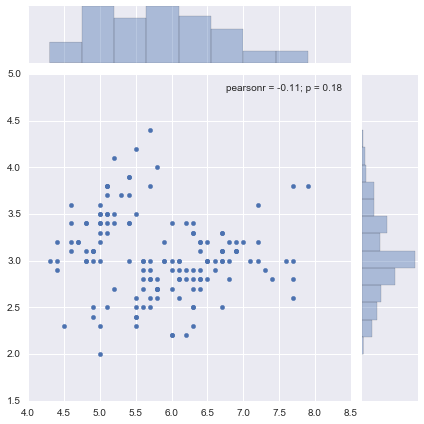

In [13]:
sns.jointplot(data1[:, 0], data1[:, 1])
plt.show()

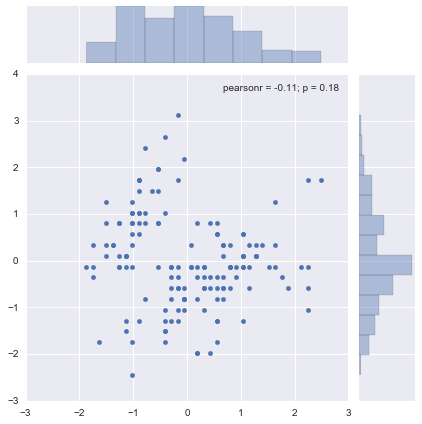

In [14]:
sns.jointplot(data2[:, 0], data2[:, 1])
plt.show()

만약 추후에 파이프 라인을 이용하게 된다면 스케일링을 함수가 아닌 스케일러 클래스로 구현해야 한다.
- scale, normalize => 함수 이름
- StandardScaler, Normalizer => class 이름

Scaler 클래스의 사용 방법은 다음과 같다.

1. 클래스 객체 생성
2. `fit()` 메서드와 트레이닝 데이터를 사용하여 변환 계수 추정
3. `transform()` 메서드를 사용하여 실제로 자료를 변환


또는 `fit_transform()` 메서드를 사용하여 계수 추정과 자료 변환을 동시에 실행할 수도 있다.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

- prediction에서만 사용한다(맞나?)
- 모델 estimation, fitting, traing 모두 같은 말
- 먼저 스케일링 하고 나서 하는 과정. c1과 c0는 기존의 것과 같은 것을 써야 한다. 왜냐하면 이것을 기준으로 w가 나오기 때문
$$ x' = c_0 + c_1 x $$    

## 정규화 (Normalization)

(비디오 추천의 사례)

정규화(Normarlization)는 스케일링과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환이다. 따라서 개별 데이터에 대해 서로 다른 변환 계수가 적용된다.

정규화는 다차원 독립 변수 벡터가 있을 때 각 벡터 원소들의 **상대적 크기만** 중요한 경우에 사용된다.

In [15]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [ 2.  1.  0.  1.  2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [ 1.  1.  1.  1.  1.]


In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data2 = normalize(data1)

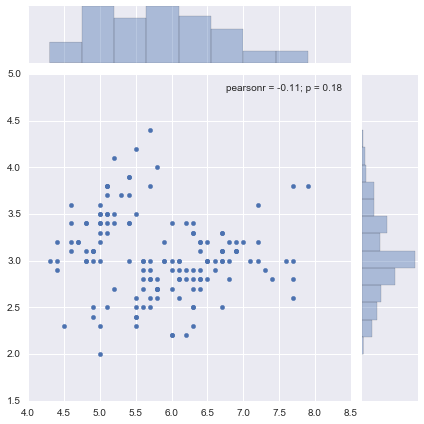

In [19]:
sns.jointplot(data1[:, 0], data1[:, 1])
plt.show()

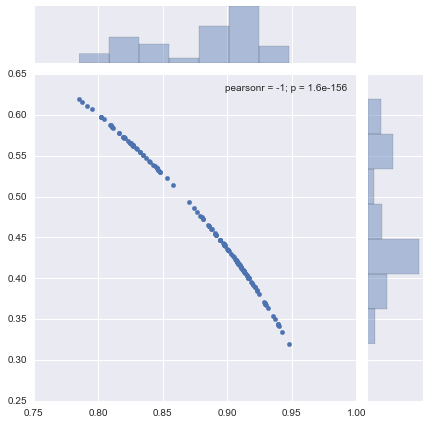

In [20]:
sns.jointplot(data2[:, 0], data2[:, 1])
plt.show()

## 인코딩(Encoding)

- 카테고리 값의 정수 표현 / 용량을 적게 사용하기 위해서 / 인코딩은 숫자로밖에 작업을 못해

인코딩은 카테고리 값이나 텍스트 정보를 처리가 쉬운 정수로 변환하는 과정이다. 

* 크기가 없는 1-of-K 라벨을 숫자로 인식되지 않도록 0/1 vector로 변환
* 실수 타겟을 유한한 정수개의 카테고리로 변환
* 복수 라벨을 가지는 경우를 포함하여 카테고리로 변환

### One-Hot-Encoder

One-Hot-Encoder는 one-of-K 인코딩이라고도 불리며 K개의 값을 가지는 스칼라 값을 0 또는1 값을 가지는 K-차원 벡터로 변환한다.
만약 입력이 스칼라가 아니라 벡터이면 stack된 결과가 출력된다. 이 때는 `feature_indices_` 를 사용하여 분리해야 한다. 
또 입력이 벡터인 경우에 특정한 열(column)만 카테고리 값이면 `categorical_features` 인수를 사용하여 카테고리 열을 지정한다. 이 때 인코딩 결과는 순서가 바뀔 수 있으므로 주의한다.

`fit` 메서드를 호출하면 다음과 같은 속성이 지정된다.

* `n_values_` : 최대 클래스 수
* `feature_indices_` : 입력이 벡터인 경우 각 원소를 나타내는 slice 정보
* `active_features_` : 실제로 사용된 클래스들

One-Hot-Encoding 결과는 메모리 절약을 위한 sparse matrix 형식으로 출력된다. 일반적인 배열로 바꾸려면 `toarray` 메서드를 사용한다.

* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [29]:
X = np.array([[0], [1], [5]])
X

array([[0],
       [1],
       [5]])

In [30]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([6]), array([0, 6], dtype=int32), array([0, 1, 5], dtype=int64))

In [31]:
ohe.transform(X).toarray()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [40]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [41]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [42]:
ohe.transform(X).toarray()

array([[ 1.,  0.,  0.,  0.,  4.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  2.]])

In [46]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[ 1.,  0.,  0.,  0.,  4.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  2.]])

### Label Encoding

Label Encoding 은 실제 값에 상관없이 $0$ ~ $K-1$ 까지의 정수로 변환한다. 변환된 규칙은 `classes_` 속성에서 확인할 수 있다. 또한 역변환을 위한 `inverse_transform` 메서드도 지원한다.

* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

In [48]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [49]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

In [50]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.classes_

array(['amsterdam', 'paris', 'tokyo'], 
      dtype='<U9')

In [51]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [52]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

### Binarizer

Binarizer 는 threshold 값을 기준으로 결과를 0, 1로 구분한다. 디폴트 threshold 는 0 이다. threshold 이 값보다 크면 1이고 아니면 0이다.


* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

In [53]:
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = Binarizer().fit(X)
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [54]:
binarizer = Binarizer(threshold=1.1)
binarizer.transform(X)

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]])

## Label Binarizer

Label Binarizer는 one-hot-encoder와 유사하지만 실제로 사용된 클래스만 인코딩에 사용하며 0/1 대신 사용할 값을 지정할 수 있다.

* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [55]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit([1, 2, 6, 1, 2])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [56]:
lb.classes_

array([1, 2, 6])

In [57]:
lb.transform([1, 6])

array([[1, 0, 0],
       [0, 0, 1]])

In [60]:
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

In [61]:
lb = LabelBinarizer(neg_label=-1)
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[ 1],
       [-1],
       [-1],
       [ 1]])

### DictVectorizer


DictVectorizer는 사전 형태로 되어 있는 feature 정보를 matrix 형태로 변환하기 위한 것으로  feature_extraction 서브 패키지에서 제공한다.
사전 정보는  텍스트 정보에서 corpus 상의 각 단어의 사용 빈도를 나타내는 경우가 많다.

* http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

In [62]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[ 2.,  0.,  1.],
       [ 0.,  1.,  3.]])

In [63]:
v.feature_names_

['bar', 'baz', 'foo']

In [64]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [65]:
v.transform({'foo': 4, 'unseen_feature': 3})

array([[ 0.,  0.,  4.]])

In [66]:
instances = [ {'city': 'New York'}, {'city': 'San Francisco'}, {'city': 'Chapel Hill'} ]
v.fit_transform(instances)

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

In [67]:
v.feature_names_

['city=Chapel Hill', 'city=New York', 'city=San Francisco']

## Imputation: 결손 데이터(missing data) 처리

Imputer는 누락된 정보를 채우는 변환이다. 다음과 같은 인수를 제공한다.

* `missing_values` : 누락 정보
* `strategy` : 채우는 방법. 디폴트는 "mean"
  * "mean": 평균
  * "median": 중앙값
  * "most_frequent": 최빈값


* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html




- 이 기능은 판다스에서 다 해준다.

In [68]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[ 1.,  2.],
       [ 4.,  3.],
       [ 7.,  6.]])

## Transform: 데이터 변환

### PolynomialFeatures

PolynomialFeatures 입력값 $x$를 다항식으로 변환한다.

$$ x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] $$

또는

$$ [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1 \cdot x_2 ] $$

다음과 같은 입력 인수를 가진다.

* `degree` : 차수
* `interaction_only`: 상호 작용 생성 여부
* `include_bias` : 상수항 생성 여부
   
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html



In [69]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [70]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [71]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])

### FunctionTransformer


FunctionTransformer 입력값 $x$를 다항식이 아닌 사용자가 원하는 함수를 사용하여 변환한다.

$$ x \;\; \rightarrow \;\; [ f_1(x),  f_2(x),  f_3(x),  \cdots ] $$


* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

In [72]:
from sklearn.preprocessing import FunctionTransformer
def all_but_first_column(X):
    return X[:, 1:]

In [73]:
X = np.arange(12).reshape(4, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [74]:
FunctionTransformer(all_but_first_column).fit_transform(X)

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])